In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Đọc dữ liệu từ file CSV
df = pd.read_csv('sample_data.csv')
df['GiaTri'] = df['GiaTri'].fillna(0)  # Thay thế giá trị NaN bằng 0
print("=== DỮ LIỆU TỔNG QUAN ===")
print(df.head())
print(f"\nSố lượng sản phẩm: {len(df)}")


=== DỮ LIỆU TỔNG QUAN ===
   ID        TenSanPham  SoLuong      GiaTri
0   1       Laptop Dell       10  25000000.0
1   2   Chuot khong day       50    350000.0
2   3  Man hinh 27 inch       15         0.0
3   4       Ban phim co       25   1800000.0
4   5         Webcam HD        5    800000.0

Số lượng sản phẩm: 20


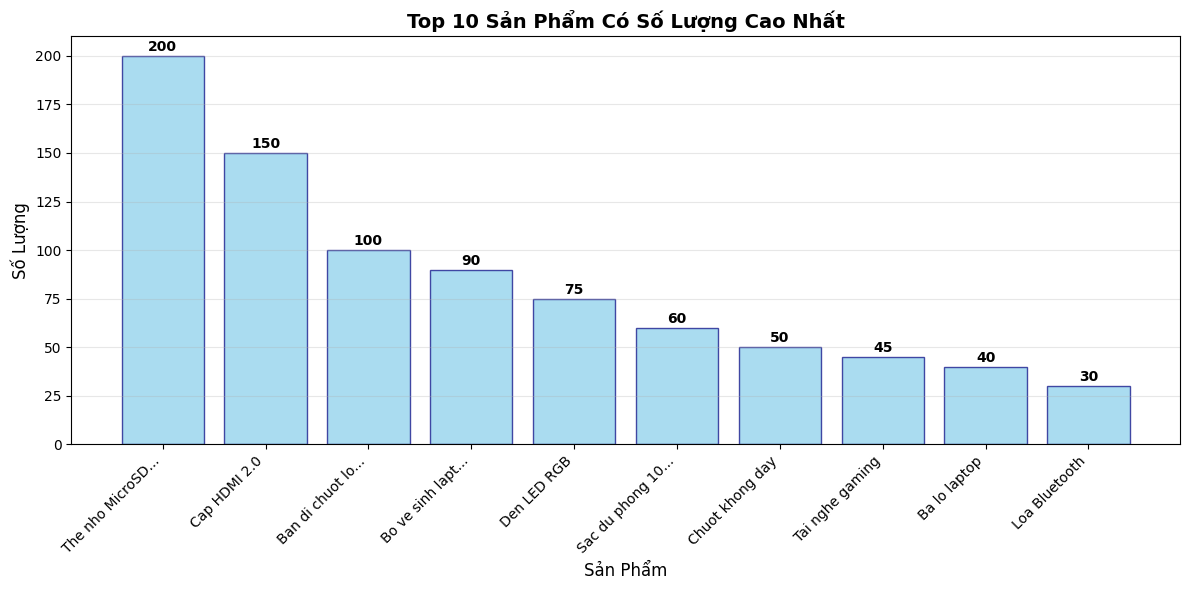

In [4]:
# ============== BIỂU ĐỒ 1: BAR CHART - TOP 10 SẢN PHẨM CÓ SỐ LƯỢNG CAO NHẤT ==============
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('sample_data.csv')
df['GiaTri'] = df['GiaTri'].fillna(0)

# Lấy top 10 sản phẩm có số lượng cao nhất
top_10 = df.nlargest(10, 'SoLuong')

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(top_10)), top_10['SoLuong'], color='skyblue', edgecolor='navy', alpha=0.7)
plt.title('Top 10 Sản Phẩm Có Số Lượng Cao Nhất', fontsize=14, fontweight='bold')
plt.xlabel('Sản Phẩm', fontsize=12)
plt.ylabel('Số Lượng', fontsize=12)
plt.xticks(range(len(top_10)), [name[:15] + '...' if len(name) > 15 else name for name in top_10['TenSanPham']],
           rotation=45, ha='right')

# Thêm giá trị lên đầu mỗi cột
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             str(top_10.iloc[i]['SoLuong']), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()


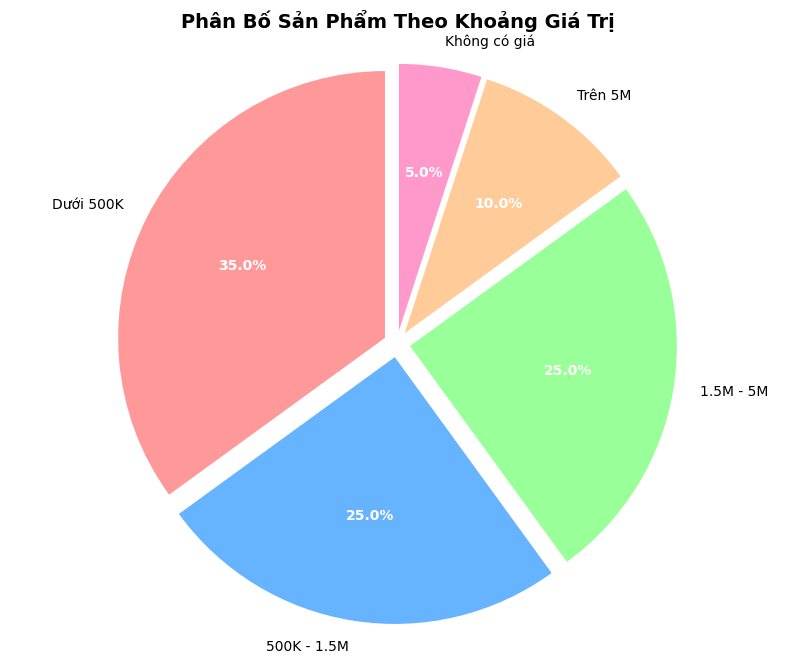

In [5]:
# ============== BIỂU ĐỒ 2: PIE CHART - PHÂN BỐ THEO KHOẢNG GIÁ TRỊ ==============
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('sample_data.csv')
df['GiaTri'] = df['GiaTri'].fillna(0)

# Phân loại theo khoảng giá trị
def phan_loai_gia(gia_tri):
    if gia_tri == 0:
        return 'Không có giá'
    elif gia_tri < 500000:
        return 'Dưới 500K'
    elif gia_tri < 1500000:
        return '500K - 1.5M'
    elif gia_tri < 5000000:
        return '1.5M - 5M'
    else:
        return 'Trên 5M'

df['NhomGia'] = df['GiaTri'].apply(phan_loai_gia)
phan_bo = df['NhomGia'].value_counts()

plt.figure(figsize=(10, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
wedges, texts, autotexts = plt.pie(phan_bo.values, labels=phan_bo.index, autopct='%1.1f%%',
                                   colors=colors, startangle=90, explode=(0.05, 0.05, 0.05, 0.05, 0.05))

plt.title('Phân Bố Sản Phẩm Theo Khoảng Giá Trị', fontsize=14, fontweight='bold')

# Tùy chỉnh text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.axis('equal')
plt.show()


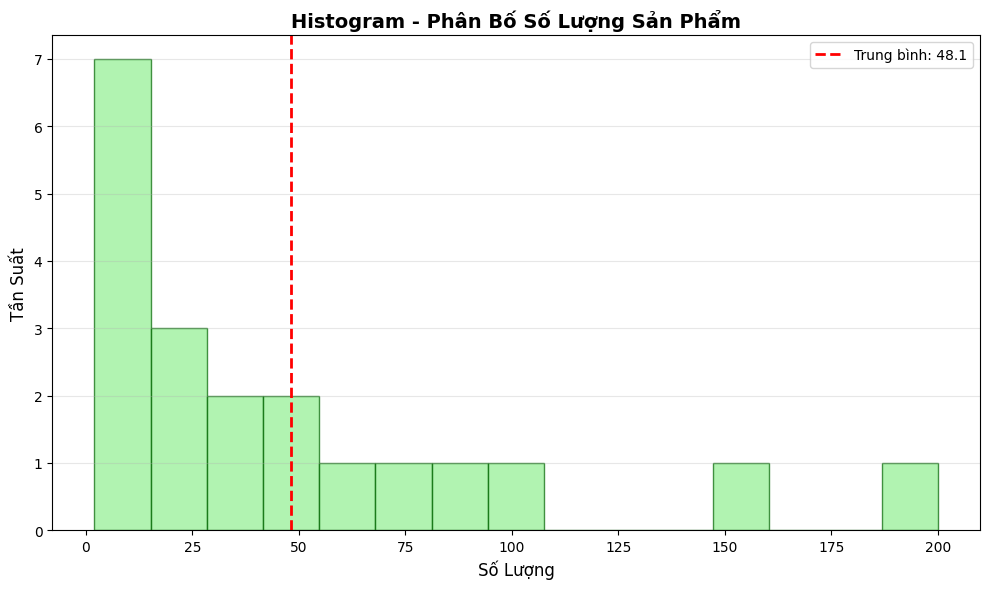

In [6]:
# ============== BIỂU ĐỒ 3: HISTOGRAM - PHÂN BỐ SỐ LƯỢNG SẢN PHẨM ==============
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('sample_data.csv')

plt.figure(figsize=(10, 6))
plt.hist(df['SoLuong'], bins=15, color='lightgreen', edgecolor='darkgreen', alpha=0.7)
plt.title('Histogram - Phân Bố Số Lượng Sản Phẩm', fontsize=14, fontweight='bold')
plt.xlabel('Số Lượng', fontsize=12)
plt.ylabel('Tần Suất', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Thêm đường trung bình
mean_value = df['SoLuong'].mean()
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Trung bình: {mean_value:.1f}')
plt.legend()

plt.tight_layout()
plt.show()


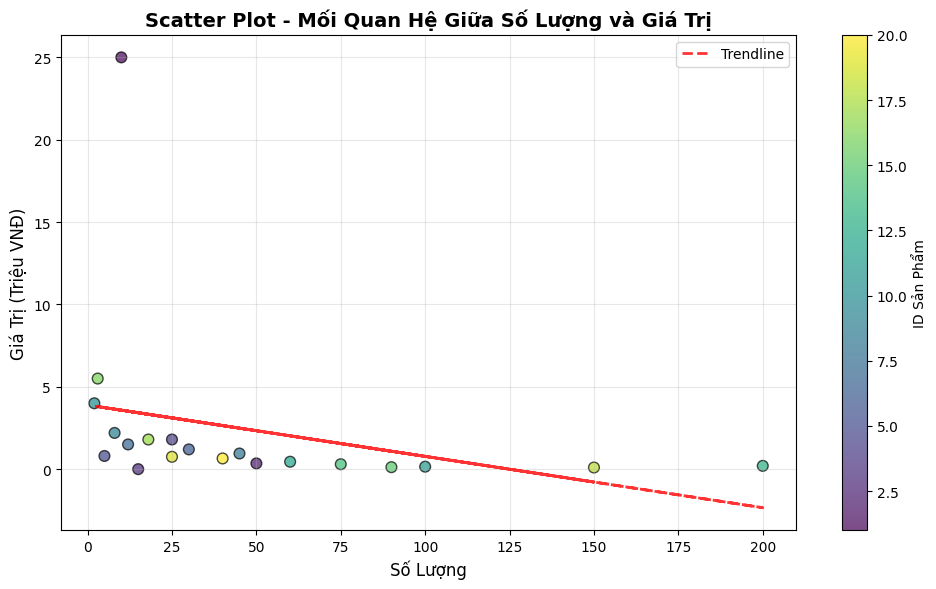

In [7]:
# ============== BIỂU ĐỒ 4: SCATTER PLOT - MỐI QUAN HỆ SỐ LƯỢNG VÀ GIÁ TRỊ ==============
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('sample_data.csv')
df['GiaTri'] = df['GiaTri'].fillna(0)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['SoLuong'], df['GiaTri']/1000000,
                     c=df['ID'], cmap='viridis', s=60, alpha=0.7, edgecolors='black')
plt.title('Scatter Plot - Mối Quan Hệ Giữa Số Lượng và Giá Trị', fontsize=14, fontweight='bold')
plt.xlabel('Số Lượng', fontsize=12)
plt.ylabel('Giá Trị (Triệu VNĐ)', fontsize=12)
plt.grid(True, alpha=0.3)

# Thêm colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('ID Sản Phẩm', fontsize=10)

# Thêm đường trendline
z = np.polyfit(df['SoLuong'], df['GiaTri']/1000000, 1)
p = np.poly1d(z)
plt.plot(df['SoLuong'], p(df['SoLuong']), "r--", alpha=0.8, linewidth=2, label='Trendline')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_2252\3454986447.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(data_for_box, labels=labels, patch_artist=True)


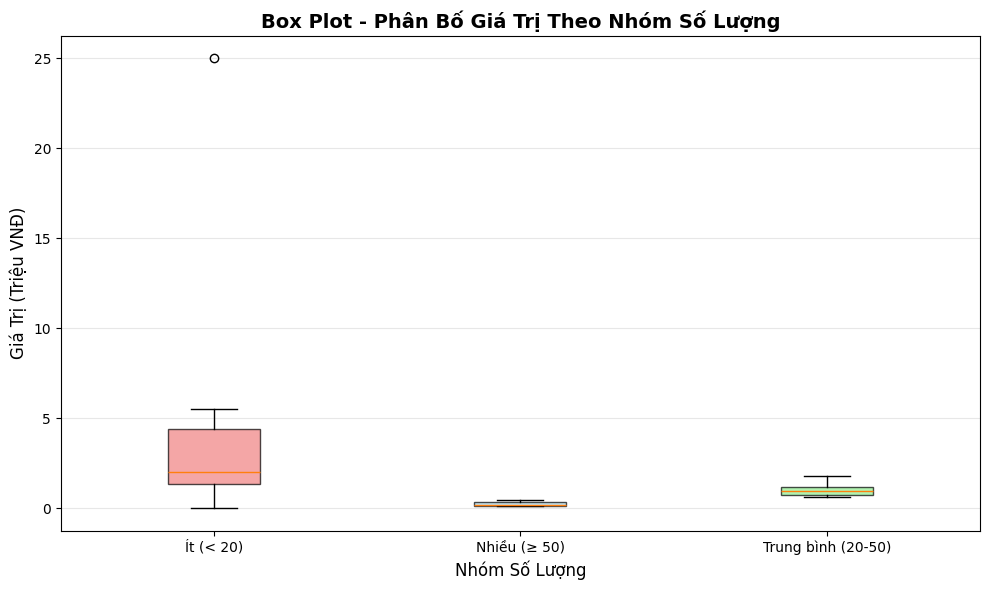

In [8]:
# ============== BIỂU ĐỒ 5: BOX PLOT - PHÂN TÍCH PHÂN BỐ GIÁ TRỊ ==============
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('sample_data.csv')
df['GiaTri'] = df['GiaTri'].fillna(0)

# Tạo nhóm theo số lượng
def nhom_so_luong(so_luong):
    if so_luong < 20:
        return 'Ít (< 20)'
    elif so_luong < 50:
        return 'Trung bình (20-50)'
    else:
        return 'Nhiều (≥ 50)'

df['NhomSoLuong'] = df['SoLuong'].apply(nhom_so_luong)

plt.figure(figsize=(10, 6))
data_for_box = [df[df['NhomSoLuong'] == nhom]['GiaTri']/1000000 for nhom in df['NhomSoLuong'].unique()]
labels = df['NhomSoLuong'].unique()

box_plot = plt.boxplot(data_for_box, labels=labels, patch_artist=True)

# Tùy chỉnh màu sắc
colors = ['lightcoral', 'lightblue', 'lightgreen']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.title('Box Plot - Phân Bố Giá Trị Theo Nhóm Số Lượng', fontsize=14, fontweight='bold')
plt.xlabel('Nhóm Số Lượng', fontsize=12)
plt.ylabel('Giá Trị (Triệu VNĐ)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


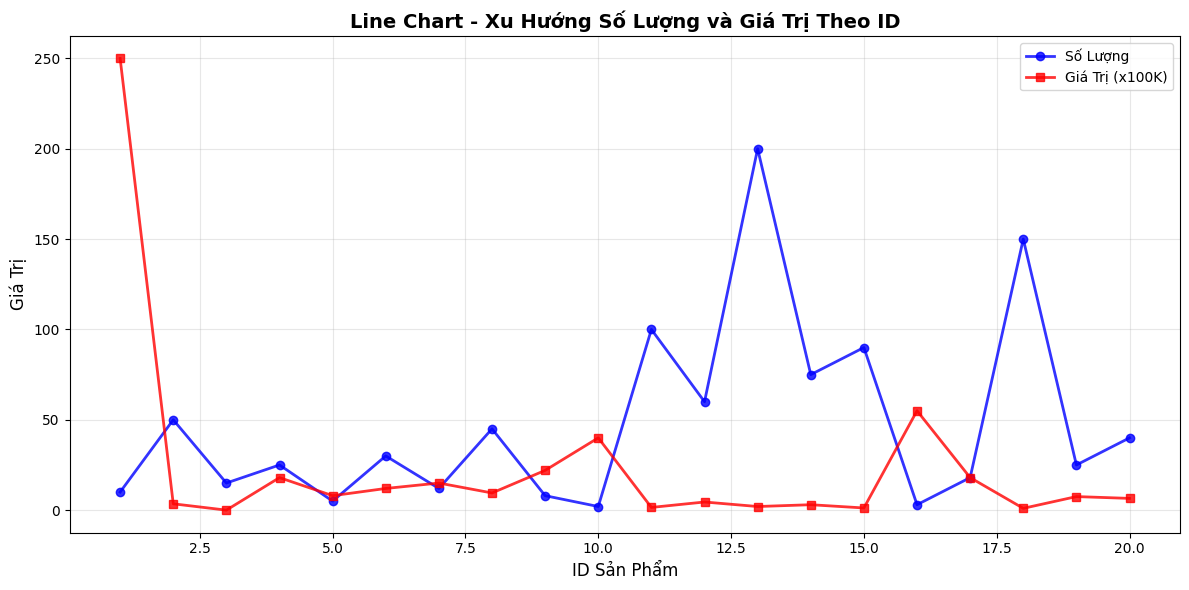

In [9]:
# ============== BIỂU ĐỒ 6: LINE CHART - XU HƯỚNG THEO ID SẢN PHẨM ==============
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('sample_data.csv')
df['GiaTri'] = df['GiaTri'].fillna(0)

plt.figure(figsize=(12, 6))
plt.plot(df['ID'], df['SoLuong'], marker='o', linewidth=2, markersize=6,
         color='blue', label='Số Lượng', alpha=0.8)
plt.plot(df['ID'], df['GiaTri']/100000, marker='s', linewidth=2, markersize=6,
         color='red', label='Giá Trị (x100K)', alpha=0.8)

plt.title('Line Chart - Xu Hướng Số Lượng và Giá Trị Theo ID', fontsize=14, fontweight='bold')
plt.xlabel('ID Sản Phẩm', fontsize=12)
plt.ylabel('Giá Trị', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


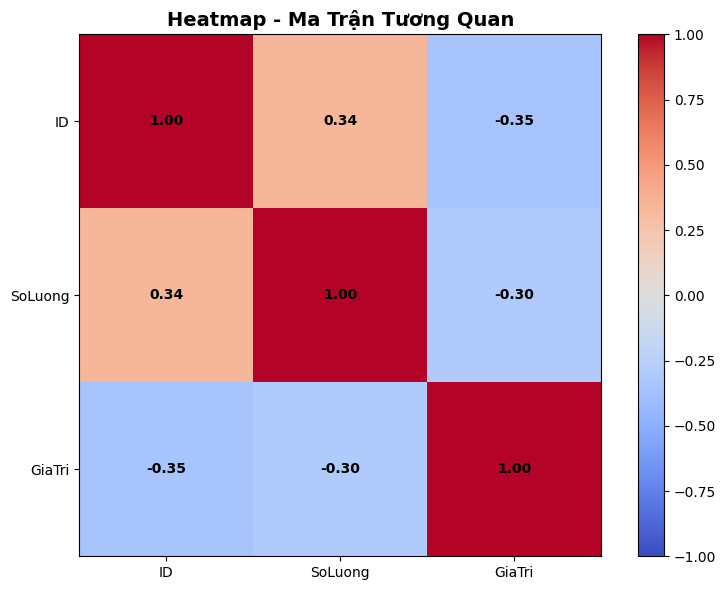

In [10]:
# ============== BIỂU ĐỒ 7: HEATMAP - MA TRẬN TƯƠNG QUAN ==============
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('sample_data.csv')
df['GiaTri'] = df['GiaTri'].fillna(0)

# Tạo ma trận tương quan
numeric_cols = df[['ID', 'SoLuong', 'GiaTri']].corr()

plt.figure(figsize=(8, 6))
im = plt.imshow(numeric_cols, cmap='coolwarm', vmin=-1, vmax=1)

# Thêm nhãn
plt.xticks(range(len(numeric_cols.columns)), numeric_cols.columns)
plt.yticks(range(len(numeric_cols.columns)), numeric_cols.columns)

# Thêm giá trị vào từng ô
for i in range(len(numeric_cols.columns)):
    for j in range(len(numeric_cols.columns)):
        text = plt.text(j, i, f'{numeric_cols.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black", fontweight='bold')

plt.title('Heatmap - Ma Trận Tương Quan', fontsize=14, fontweight='bold')
plt.colorbar(im)
plt.tight_layout()
plt.show()


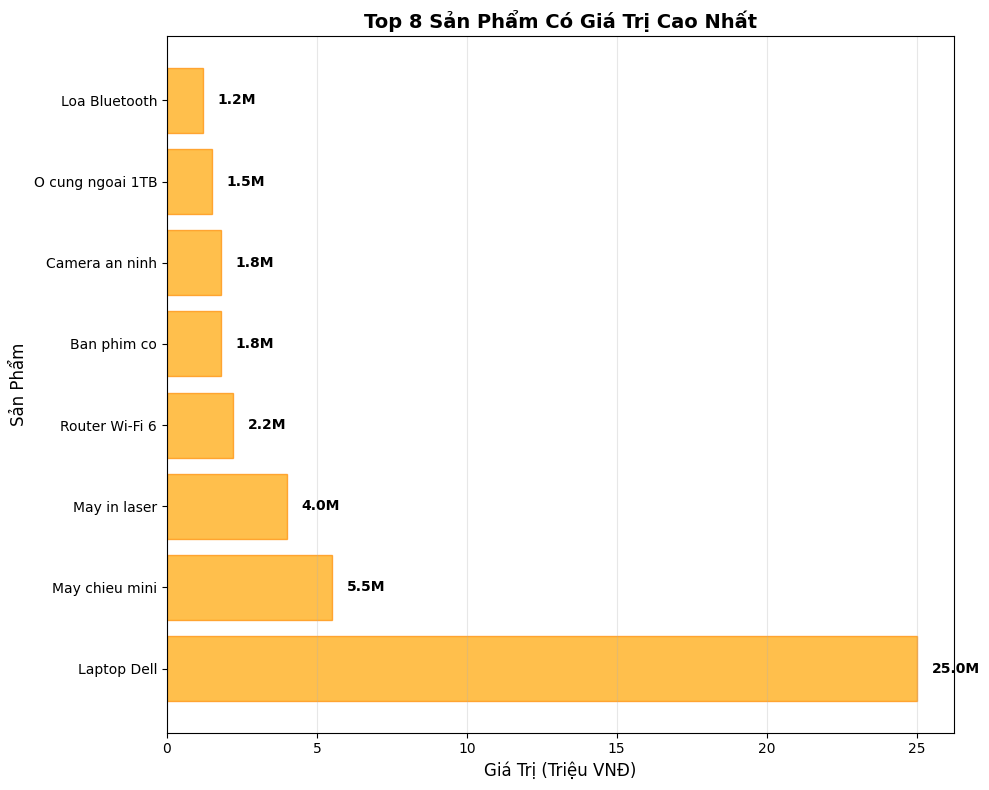

In [11]:
# ============== BIỂU ĐỒ 8: HORIZONTAL BAR CHART - TOP 8 SẢN PHẨM THEO GIÁ TRỊ ==============
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('sample_data.csv')
df['GiaTri'] = df['GiaTri'].fillna(0)

# Lấy top 8 sản phẩm có giá trị cao nhất (loại bỏ giá trị = 0)
top_8_gia_tri = df[df['GiaTri'] > 0].nlargest(8, 'GiaTri')

plt.figure(figsize=(10, 8))
y_pos = np.arange(len(top_8_gia_tri))
bars = plt.barh(y_pos, top_8_gia_tri['GiaTri']/1000000, color='orange', alpha=0.7, edgecolor='darkorange')

plt.title('Top 8 Sản Phẩm Có Giá Trị Cao Nhất', fontsize=14, fontweight='bold')
plt.xlabel('Giá Trị (Triệu VNĐ)', fontsize=12)
plt.ylabel('Sản Phẩm', fontsize=12)
plt.yticks(y_pos, [name[:25] + '...' if len(name) > 25 else name for name in top_8_gia_tri['TenSanPham']])

# Thêm giá trị cuối mỗi thanh
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{top_8_gia_tri.iloc[i]["GiaTri"]/1000000:.1f}M',
             ha='left', va='center', fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


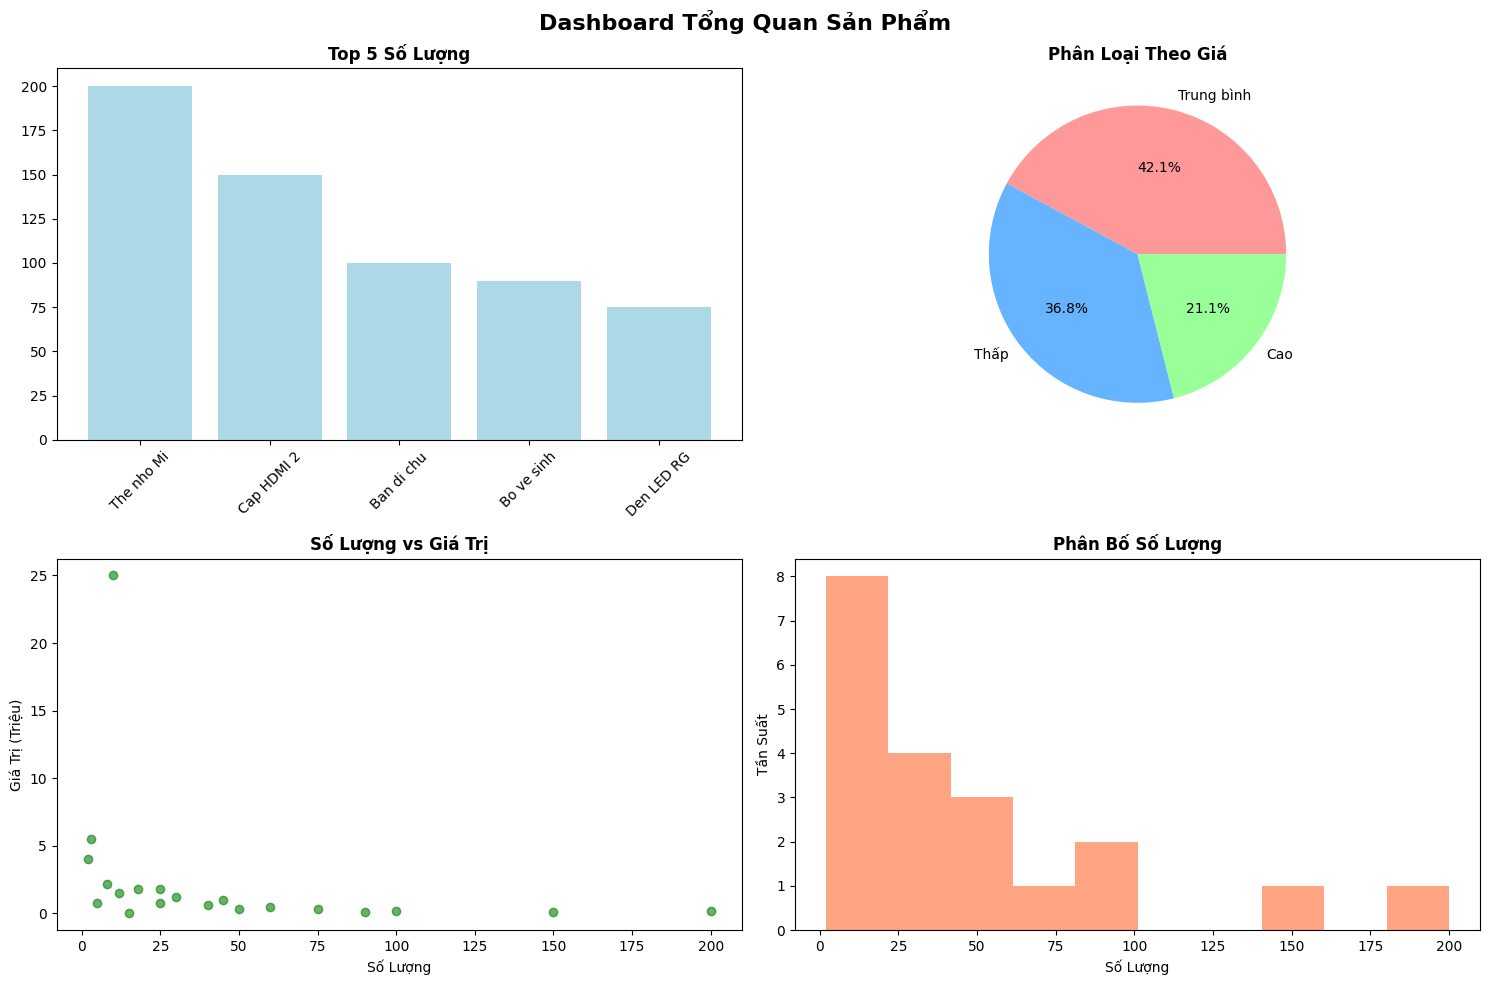

In [12]:
# ============== BIỂU ĐỒ 9: SUBPLOTS - NHIỀU BIỂU ĐỒ TRONG MỘT FIGURE ==============
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('sample_data.csv')
df['GiaTri'] = df['GiaTri'].fillna(0)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Subplot 1: Bar chart số lượng
top_5 = df.nlargest(5, 'SoLuong')
ax1.bar(range(len(top_5)), top_5['SoLuong'], color='lightblue')
ax1.set_title('Top 5 Số Lượng', fontweight='bold')
ax1.set_xticks(range(len(top_5)))
ax1.set_xticklabels([name[:10] for name in top_5['TenSanPham']], rotation=45)

# Subplot 2: Pie chart phân loại giá
gia_tri_groups = pd.cut(df['GiaTri'], bins=[0, 500000, 2000000, float('inf')],
                       labels=['Thấp', 'Trung bình', 'Cao'])
gia_tri_counts = gia_tri_groups.value_counts()
ax2.pie(gia_tri_counts.values, labels=gia_tri_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99'])
ax2.set_title('Phân Loại Theo Giá', fontweight='bold')

# Subplot 3: Scatter plot
ax3.scatter(df['SoLuong'], df['GiaTri']/1000000, alpha=0.6, color='green')
ax3.set_title('Số Lượng vs Giá Trị', fontweight='bold')
ax3.set_xlabel('Số Lượng')
ax3.set_ylabel('Giá Trị (Triệu)')

# Subplot 4: Histogram
ax4.hist(df['SoLuong'], bins=10, color='coral', alpha=0.7)
ax4.set_title('Phân Bố Số Lượng', fontweight='bold')
ax4.set_xlabel('Số Lượng')
ax4.set_ylabel('Tần Suất')

plt.suptitle('Dashboard Tổng Quan Sản Phẩm', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


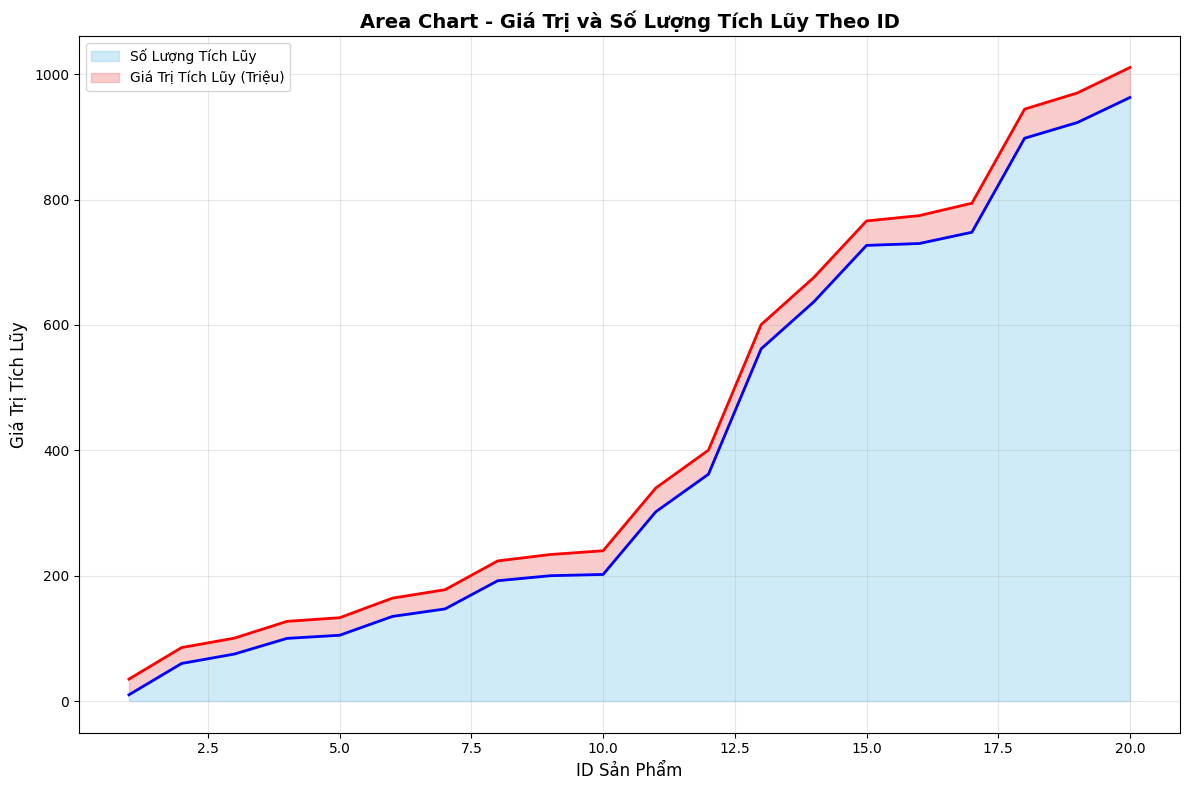

In [13]:
# ============== BIỂU ĐỒ 10: AREA CHART - BIỂU ĐỒ DIỆN TÍCH TÍCH LŨY ==============
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('sample_data.csv')
df['GiaTri'] = df['GiaTri'].fillna(0)

# Sắp xếp theo ID và tính giá trị tích lũy
df_sorted = df.sort_values('ID')
df_sorted['GiaTriTichLuy'] = df_sorted['GiaTri'].cumsum()
df_sorted['SoLuongTichLuy'] = df_sorted['SoLuong'].cumsum()

plt.figure(figsize=(12, 8))

# Tạo area chart với 2 series
plt.fill_between(df_sorted['ID'], 0, df_sorted['SoLuongTichLuy'],
                 alpha=0.4, color='skyblue', label='Số Lượng Tích Lũy')
plt.fill_between(df_sorted['ID'], df_sorted['SoLuongTichLuy'],
                 df_sorted['SoLuongTichLuy'] + df_sorted['GiaTriTichLuy']/1000000,
                 alpha=0.4, color='lightcoral', label='Giá Trị Tích Lũy (Triệu)')

# Thêm đường viền
plt.plot(df_sorted['ID'], df_sorted['SoLuongTichLuy'], color='blue', linewidth=2)
plt.plot(df_sorted['ID'], df_sorted['SoLuongTichLuy'] + df_sorted['GiaTriTichLuy']/1000000,
         color='red', linewidth=2)

plt.title('Area Chart - Giá Trị và Số Lượng Tích Lũy Theo ID', fontsize=14, fontweight='bold')
plt.xlabel('ID Sản Phẩm', fontsize=12)
plt.ylabel('Giá Trị Tích Lũy', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
